In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

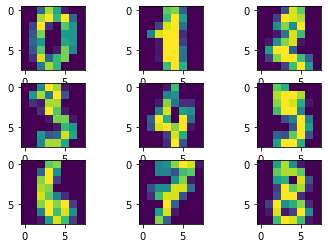

In [3]:
digits = load_digits()

f, axis = plt.subplots(3,3)
axis[0,0].imshow(digits.images[0])
axis[0,1].imshow(digits.images[1])
axis[0,2].imshow(digits.images[2])
axis[1,0].imshow(digits.images[3])
axis[1,1].imshow(digits.images[4])
axis[1,2].imshow(digits.images[5])
axis[2,0].imshow(digits.images[6])
axis[2,1].imshow(digits.images[7])
axis[2,2].imshow(digits.images[8])
plt.show()

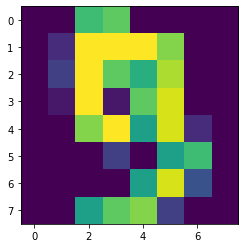

In [4]:
plt.imshow(digits.images[9]) 

In [5]:
class LogisticRegression():     # Class for training and using a model for logistic regression
    
    
    def set_values(self, initial_params, alpha=0.01, max_iter=5000, class_of_interest=0): 
        
        #using self as it increases the readibility of the code
        
        #Setting the values 
        
        self.params = initial_params                          # initial params
        self.alpha = alpha                                    # step size 
        self.max_iter = max_iter                              # maximum iteration
        self.class_of_interest = class_of_interest            #class of interest
        
    
    @staticmethod
    def _sigmoid(x): #Sigmoid function block
        
        
        return 1.0 / (1.0 + np.exp(-x))
    
    def predict(self, x_bar, params): #predict the probability of a class
        
                
        return self._sigmoid(np.dot(params, x_bar))
    
    def _compute_cost(self, input_var, output_var, params): #cost function block
        
        
        cost = 0
        for x, y in zip(input_var, output_var): #to map the similar index of two arrays
            x_bar = np.array(np.insert(x, 0, 1))
            y_hat = self.predict(x_bar, params)
            
            y_binary = 1.0 if y == self.class_of_interest else 0.0
            cost += y_binary * np.log(y_hat) + (1.0 - y_binary) * np.log(1 - y_hat)
            
        return cost
    
    def train(self, input_var, label, print_iter = 5000):
        
        
        iteration = 1
        while iteration < self.max_iter:
            if iteration % print_iter == 0:
                print(f'iteration: {iteration}')
                print(f'cost: {self._compute_cost(input_var, label, self.params)}')
                print('--------------------------------------------')
            
            for i, xy in enumerate(zip(input_var, label)): 
                x_bar = np.array(np.insert(xy[0], 0, 1))
                y_hat = self.predict(x_bar, self.params)
                
                y_binary = 1.0 if xy[1] == self.class_of_interest else 0.0
                gradient = (y_binary - y_hat) * x_bar
                self.params += self.alpha * gradient
            
            iteration +=1
        
        return self.params

    def test(self, input_test, label_test):
       # Testing the accuracy of the model using test data
        self.total_classifications = 0
        self.correct_classifications = 0
        
        for x,y in zip(input_test, label_test):
            self.total_classifications += 1
            x_bar = np.array(np.insert(x, 0, 1))
            y_hat = self.predict(x_bar, self.params)
            y_binary = 1.0 if y == self.class_of_interest else 0.0
            
            if y_hat >= 0.5 and  y_binary == 1:
                # correct classification of class_of_interest
                self.correct_classifications += 1
              
            if y_hat < 0.5 and  y_binary != 1:
                # correct classification of an other class
                self.correct_classifications += 1
                
        self.accuracy = self.correct_classifications / self.total_classifications
            
        return self.accuracy

In [6]:
# splitting the data to training and test sets
digits_train, digits_test, digits_label_train, digits_label_test =\
train_test_split(digits.data, digits.target, test_size=0.20)

In [7]:
# training a classifier for the ZERO digit
alpha = 1e-2
params_0 = np.zeros(len(digits.data[0]) + 1)

max_iter = 10000
digits_regression_model_0 = LogisticRegression()
digits_regression_model_0.set_values(params_0, alpha, max_iter, 0)

params =\
digits_regression_model_0.train(digits_train / 16.0, digits_label_train, 1000)

iteration: 1000
cost: -1.6188049463746355
--------------------------------------------
iteration: 2000
cost: -0.9102805371971725
--------------------------------------------
iteration: 3000
cost: -0.6415281915982594
--------------------------------------------
iteration: 4000
cost: -0.4978803206881576
--------------------------------------------
iteration: 5000
cost: -0.4078857925150353
--------------------------------------------
iteration: 6000
cost: -0.3459961330828373
--------------------------------------------
iteration: 7000
cost: -0.3007257572193002
--------------------------------------------
iteration: 8000
cost: -0.26612298649090405
--------------------------------------------
iteration: 9000
cost: -0.23878687276922336
--------------------------------------------


In [8]:
# accuracy
digits_accuracy = digits_regression_model_0.test(digits_test / 16.0, digits_label_test)
print(f'Accuracy of prediciting a ZERO digit in test set: {digits_accuracy}')

Accuracy of prediciting a ZERO digit in test set: 0.9944444444444445


In [9]:
# training a classifier for the ONE digit
alpha = 1e-2
params_0 = np.zeros(len(digits.data[0]) + 1)

max_iter = 10000
digits_regression_model_1 = LogisticRegression()
digits_regression_model_1.set_values(params_0, alpha, max_iter, 1)

params =\
digits_regression_model_1.train(digits_train / 16.0, digits_label_train, 1000)

iteration: 1000
cost: -32.89496676952286
--------------------------------------------
iteration: 2000
cost: -26.09004889771969
--------------------------------------------
iteration: 3000
cost: -22.667628752915576
--------------------------------------------
iteration: 4000
cost: -20.447631870618128
--------------------------------------------
iteration: 5000
cost: -18.825950788084903
--------------------------------------------
iteration: 6000
cost: -17.557090219576743
--------------------------------------------
iteration: 7000
cost: -16.51915702899838
--------------------------------------------
iteration: 8000
cost: -15.643523067240235
--------------------------------------------
iteration: 9000
cost: -14.888026363848862
--------------------------------------------


In [10]:
#accuracy
digits_accuracy = digits_regression_
model_1.test(digits_test / 16.0, digits_label_test)
print(f'Accuracy of prediciting a ONE digit in test set: {digits_accuracy}')

Accuracy of prediciting a ONE digit in test set: 0.9777777777777777


In [11]:
# training a classifier for the TWO digit
alpha = 1e-2
params_2 = np.zeros(len(digits.data[0]) + 1)

max_iter = 10000
digits_regression_model_2 = LogisticRegression()
digits_regression_model_2.set_values(params_2, alpha, max_iter, 2)

params =\
digits_regression_model_2.train(digits_train / 16.0, digits_label_train, 1000)

iteration: 1000
cost: -2.9011462307044393
--------------------------------------------
iteration: 2000
cost: -1.61598079729941
--------------------------------------------
iteration: 3000
cost: -1.1365444730148377
--------------------------------------------
iteration: 4000
cost: -0.881885193686448
--------------------------------------------
iteration: 5000
cost: -0.7228150512110911
--------------------------------------------
iteration: 6000
cost: -0.6135851851351486
--------------------------------------------
iteration: 7000
cost: -0.5337448297073993
--------------------------------------------
iteration: 8000
cost: -0.4727355090035416
--------------------------------------------
iteration: 9000
cost: -0.4245389788036981
--------------------------------------------


In [13]:
#accuracy
digits_accuracy = digits_regression_model_2.test(digits_test / 16.0, digits_label_test)
print(f'Accuracy of prediciting a TWO digit in test set: {digits_accuracy}')

Accuracy of prediciting a TWO digit in test set: 1.0


In [21]:
# training a classifier for the THREE digit
alpha = 1e-2
params_3 = np.zeros(len(digits.data[0]) + 1)

max_iter = 10000
digits_regression_model_3 = LogisticRegression()
digits_regression_model_3.set_values(params_2, alpha, max_iter, 3)

params =\
digits_regression_model_3.train(digits_train / 16.0, digits_label_train, 1000)

#accuracy
digits_accuracy = digits_regression_model_3.test(digits_test / 16.0, digits_label_test)
print(f'Accuracy of prediciting a THREE digit in test set: {digits_accuracy}')

iteration: 1000
cost: -12.820339300327655
--------------------------------------------
iteration: 2000
cost: -8.857864268866702
--------------------------------------------
iteration: 3000
cost: -6.956523234870908
--------------------------------------------
iteration: 4000
cost: -5.782692617766531
--------------------------------------------
iteration: 5000
cost: -4.969072343457758
--------------------------------------------
iteration: 6000
cost: -4.365541736898545
--------------------------------------------
iteration: 7000
cost: -3.897354411557587
--------------------------------------------
iteration: 8000
cost: -3.522337463202784
--------------------------------------------
iteration: 9000
cost: -3.214577222876764
--------------------------------------------
Accuracy of prediciting a THREE digit in test set: 0.9527777777777777


In [22]:
# training a classifier for the FOUR digit
alpha = 1e-2
params_4 = np.zeros(len(digits.data[0]) + 1)

max_iter = 10000
digits_regression_model_4 = LogisticRegression()
digits_regression_model_4.set_values(params_4, alpha, max_iter, 4)

params =\
digits_regression_model_4.train(digits_train / 16.0, digits_label_train, 1000)

#accuracy
digits_accuracy = digits_regression_model_4.test(digits_test / 16.0, digits_label_test)
print(f'Accuracy of prediciting a FOUR digit in test set: {digits_accuracy}')

iteration: 1000
cost: -4.564547558642502
--------------------------------------------
iteration: 2000
cost: -2.6910855575868826
--------------------------------------------
iteration: 3000
cost: -1.9420321048473457
--------------------------------------------
iteration: 4000
cost: -1.5300756612585802
--------------------------------------------
iteration: 5000
cost: -1.2670913149197198
--------------------------------------------
iteration: 6000
cost: -1.0837262077883765
--------------------------------------------
iteration: 7000
cost: -0.9481487809899838
--------------------------------------------
iteration: 8000
cost: -0.8436075954927039
--------------------------------------------
iteration: 9000
cost: -0.760412717743916
--------------------------------------------
Accuracy of prediciting a TWO digit in test set: 0.9972222222222222


In [23]:
# training a classifier for the FIVE digit
alpha = 1e-2
params_5 = np.zeros(len(digits.data[0]) + 1)

max_iter = 10000
digits_regression_model_5 = LogisticRegression()
digits_regression_model_5.set_values(params_5, alpha, max_iter, 5)

params =\
digits_regression_model_5.train(digits_train / 16.0, digits_label_train, 1000)

#accuracy
digits_accuracy = digits_regression_model_5.test(digits_test / 16.0, digits_label_test)
print(f'Accuracy of prediciting a FIVE digit in test set: {digits_accuracy}')

iteration: 1000
cost: -9.74935852241987
--------------------------------------------
iteration: 2000
cost: -6.121680421763806
--------------------------------------------
iteration: 3000
cost: -4.535277608304822
--------------------------------------------
iteration: 4000
cost: -3.6229599707744073
--------------------------------------------
iteration: 5000
cost: -3.0245621157872553
--------------------------------------------
iteration: 6000
cost: -2.599866446147323
--------------------------------------------
iteration: 7000
cost: -2.282010577753134
--------------------------------------------
iteration: 8000
cost: -2.0347948571776113
--------------------------------------------
iteration: 9000
cost: -1.836819978411585
--------------------------------------------
Accuracy of prediciting a FIVE digit in test set: 0.9888888888888889


In [25]:
# training a classifier for the SIX digit
alpha = 1e-2
params_6 = np.zeros(len(digits.data[0]) + 1)

max_iter = 10000
digits_regression_model_6 = LogisticRegression()
digits_regression_model_6.set_values(params_6, alpha, max_iter, 6)

params =\
digits_regression_model_6.train(digits_train / 16.0, digits_label_train, 1000)

#accuracy
digits_accuracy = digits_regression_model_6.test(digits_test / 16.0, digits_label_test)
print(f'Accuracy of prediciting a SIX digit in test set: {digits_accuracy}')

iteration: 1000
cost: -4.723904723413962
--------------------------------------------
iteration: 2000
cost: -2.687361430417581
--------------------------------------------
iteration: 3000
cost: -1.898351182055762
--------------------------------------------
iteration: 4000
cost: -1.4737838261289233
--------------------------------------------
iteration: 5000
cost: -1.2071070780629953
--------------------------------------------
iteration: 6000
cost: -1.0235332374896777
--------------------------------------------
iteration: 7000
cost: -0.8892200954524749
--------------------------------------------
iteration: 8000
cost: -0.7865657495819326
--------------------------------------------
iteration: 9000
cost: -0.7054898515176432
--------------------------------------------
Accuracy of prediciting a SIX digit in test set: 0.9972222222222222


In [27]:
# training a classifier for the SEVEN digit
alpha = 1e-2
params_7 = np.zeros(len(digits.data[0]) + 1)

max_iter = 10000
digits_regression_model_7 = LogisticRegression()
digits_regression_model_7.set_values(params_7, alpha, max_iter, 7)

params =\
digits_regression_model_7.train(digits_train / 16.0, digits_label_train, 1000)

#accuracy
digits_accuracy = digits_regression_model_7.test(digits_test / 16.0, digits_label_test)
print(f'Accuracy of prediciting a SEVEN digit in test set: {digits_accuracy}')

iteration: 1000
cost: -5.87309143053808
--------------------------------------------
iteration: 2000
cost: -3.4826499229563455
--------------------------------------------
iteration: 3000
cost: -2.498574302390273
--------------------------------------------
iteration: 4000
cost: -1.9547765456783937
--------------------------------------------
iteration: 5000
cost: -1.6082902785733204
--------------------------------------------
iteration: 6000
cost: -1.3676712816830208
--------------------------------------------
iteration: 7000
cost: -1.1905741920962873
--------------------------------------------
iteration: 8000
cost: -1.0546425943586801
--------------------------------------------
iteration: 9000
cost: -0.9469397470471853
--------------------------------------------
Accuracy of prediciting a SEVEN digit in test set: 0.9944444444444445


In [28]:
# training a classifier for the EIGHT digit
alpha = 1e-2
params_8 = np.zeros(len(digits.data[0]) + 1)

max_iter = 10000
digits_regression_model_8 = LogisticRegression()
digits_regression_model_8.set_values(params_8, alpha, max_iter, 8)

params =\
digits_regression_model_8.train(digits_train / 16.0, digits_label_train, 1000)

#accuracy
digits_accuracy = digits_regression_model_8.test(digits_test / 16.0, digits_label_test)
print(f'Accuracy of prediciting an EIGHT digit in test set: {digits_accuracy}')

iteration: 1000
cost: -103.3361824857824
--------------------------------------------
iteration: 2000
cost: -100.93167566162265
--------------------------------------------
iteration: 3000
cost: -100.22694004483888
--------------------------------------------
iteration: 4000
cost: -99.92926479744887
--------------------------------------------
iteration: 5000
cost: -99.7659600420248
--------------------------------------------
iteration: 6000
cost: -99.6554035112111
--------------------------------------------
iteration: 7000
cost: -99.56868403195826
--------------------------------------------
iteration: 8000
cost: -99.49434334439944
--------------------------------------------
iteration: 9000
cost: -99.42740582291476
--------------------------------------------
Accuracy of prediciting an EIGHT digit in test set: 0.9694444444444444


In [29]:
# training a classifier for the NINE digit
alpha = 1e-2
params_9 = np.zeros(len(digits.data[0]) + 1)

max_iter = 10000
digits_regression_model_9 = LogisticRegression()
digits_regression_model_9.set_values(params_9, alpha, max_iter, 9)

params =\
digits_regression_model_9.train(digits_train / 16.0, digits_label_train, 1000)

#accuracy
digits_accuracy = digits_regression_model_9.test(digits_test / 16.0, digits_label_test)
print(f'Accuracy of prediciting a NINE digit in test set: {digits_accuracy}')

iteration: 1000
cost: -32.71405847816719
--------------------------------------------
iteration: 2000
cost: -27.60132410640159
--------------------------------------------
iteration: 3000
cost: -25.099211398392903
--------------------------------------------
iteration: 4000
cost: -23.513731200840418
--------------------------------------------
iteration: 5000
cost: -22.375697796083596
--------------------------------------------
iteration: 6000
cost: -21.494252683755875
--------------------------------------------
iteration: 7000
cost: -20.775800310550466
--------------------------------------------
iteration: 8000
cost: -20.168753952206853
--------------------------------------------
iteration: 9000
cost: -19.64220302498558
--------------------------------------------
Accuracy of prediciting a NINE digit in test set: 0.9861111111111112
